In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
from pandas import Series
from numpy import log
import plotly.offline as py

In [2]:
# TSA Mantra
# 1. Data should be numeric, not in category
# 2. Data type is correct and should be datetime column
# 3. There should not be any missing data, if yes, first impute and then try to solve
# 4. Data should be in sequential order (Timeseries always in ascending order)
# 5. Weather data has trend, seasonality, Error or abrupt changes or something x changes


In [3]:
df = pd.read_csv('/Users/pawankumarkc/Documents/vscode_workspace/MLAlgo/datasets/TSForecasting/TCS.NS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,05/03/19,2005.000000,2007.000000,1976.599976,1988.099976,1779.321899,2449622
1,06/03/19,1989.300049,2015.000000,1985.050049,1999.599976,1789.614136,2635047
2,07/03/19,2005.000000,2024.050049,2000.199951,2013.300049,1801.875977,2539884
3,08/03/19,2025.000000,2033.000000,2010.050049,2022.699951,1810.288452,2031071
4,11/03/19,2028.900024,2033.000000,2003.650024,2014.800049,1803.218384,3111689


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1235 non-null   object 
 1   Open       1235 non-null   float64
 2   High       1235 non-null   float64
 3   Low        1235 non-null   float64
 4   Close      1235 non-null   float64
 5   Adj Close  1235 non-null   float64
 6   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1235 non-null   datetime64[ns]
 1   Open       1235 non-null   float64       
 2   High       1235 non-null   float64       
 3   Low        1235 non-null   float64       
 4   Close      1235 non-null   float64       
 5   Adj Close  1235 non-null   float64       
 6   Volume     1235 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 67.7 KB


In [7]:
#Check for auto-correlation

import statsmodels.api as sm
sm.stats.durbin_watson(df['Volume'])

#0.2528871438997474 is positive autocorrelation

0.2528871438997474

In [8]:
print(sm.stats.durbin_watson(df['Open']))
print(sm.stats.durbin_watson(df['Close']))


0.00020847298932672522
0.00020450938267665904


In [9]:
# There are some holiday and weekend data missing
# Series has to read as a daily series with Mon-Friday as weekdays, hence frequency is defined as bisiness day.
# Else if you define freq as 365 days, it would assume that stock exchange was working for all 365 days

from pandas.tseries.offsets import BDay #BDay is Business day (Mon-Fri)
df.shape

(1235, 7)

In [10]:
df_date = df[['Date', 'Volume']]
df_date.head()

,Date,Volume
0,2019-05-03,2449622
1,2019-06-03,2635047
2,2019-07-03,2539884
3,2019-08-03,2031071
4,2019-11-03,3111689


In [11]:
date1 = pd.date_range(start='3/5/2019', end='1/3/2024', freq=BDay())
date1

DatetimeIndex(['2019-03-05', '2019-03-06', '2019-03-07', '2019-03-08',
               '2019-03-11', '2019-03-12', '2019-03-13', '2019-03-14',
               '2019-03-15', '2019-03-18',
               ...
               '2023-12-21', '2023-12-22', '2023-12-25', '2023-12-26',
               '2023-12-27', '2023-12-28', '2023-12-29', '2024-01-01',
               '2024-01-02', '2024-01-03'],
              dtype='datetime64[ns]', length=1262, freq='B')

In [12]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
us_bd

<CustomBusinessDay>

In [13]:
date1 = pd.date_range(start='3/5/2019', end='1/3/2024', freq=us_bd)
date1

DatetimeIndex(['2019-03-05', '2019-03-06', '2019-03-07', '2019-03-08',
               '2019-03-11', '2019-03-12', '2019-03-13', '2019-03-14',
               '2019-03-15', '2019-03-18',
               ...
               '2023-12-19', '2023-12-20', '2023-12-21', '2023-12-22',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2024-01-02', '2024-01-03'],
              dtype='datetime64[ns]', length=1211, freq='C')

In [14]:
df_final = pd.read_csv('/Users/pawankumarkc/Documents/vscode_workspace/MLAlgo/datasets/TSForecasting/TCS.NS.csv',
                        parse_dates=True, squeeze=True, index_col=0)

#Sqeeze will return index col as series


In [15]:
df_final.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-03,2005.000000,2007.000000,1976.599976,1988.099976,1779.321899,2449622
2019-06-03,1989.300049,2015.000000,1985.050049,1999.599976,1789.614136,2635047
2019-07-03,2005.000000,2024.050049,2000.199951,2013.300049,1801.875977,2539884
2019-08-03,2025.000000,2033.000000,2010.050049,2022.699951,1810.288452,2031071
2019-11-03,2028.900024,2033.000000,2003.650024,2014.800049,1803.218384,3111689


In [16]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-05-03 to 2024-01-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


<Figure size 1500x800 with 0 Axes>

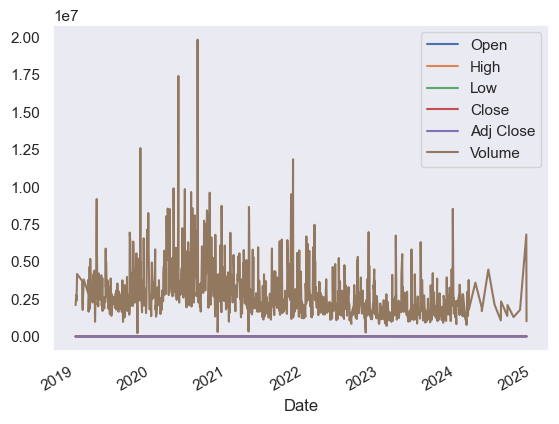

In [17]:
#Taking the data which we only want to predict

plt.figure(figsize=(15,8))
df_final.plot()
plt.grid()

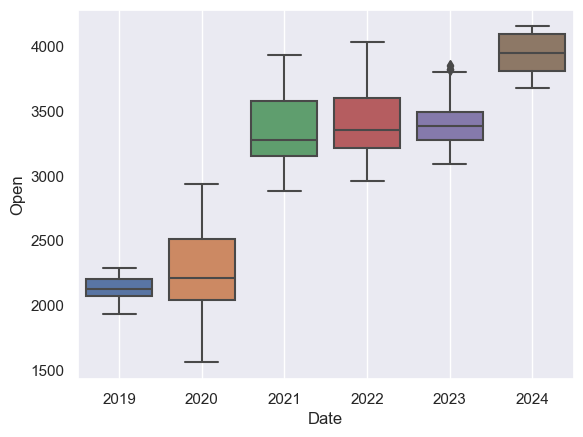

In [18]:
# Box plot of open balance WRT different years
sns.boxplot( x=df_final.index.year, y= df_final['Open'])
plt.grid()


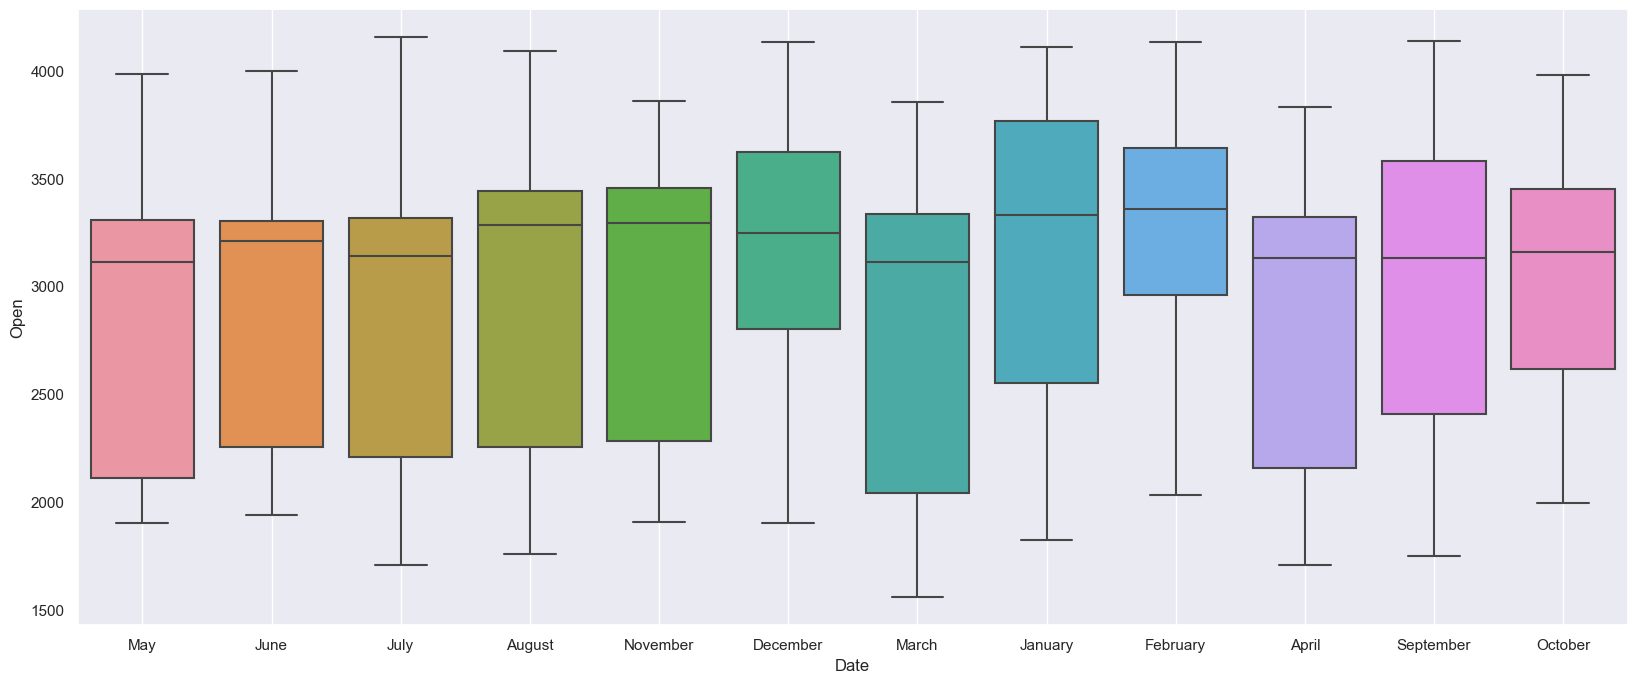

In [19]:
# Box plot of open balance WRT different months 

plt.figure(figsize=(20,8))
sns.boxplot( x=df_final.index.month_name(), y= df_final['Open'])
plt.grid()

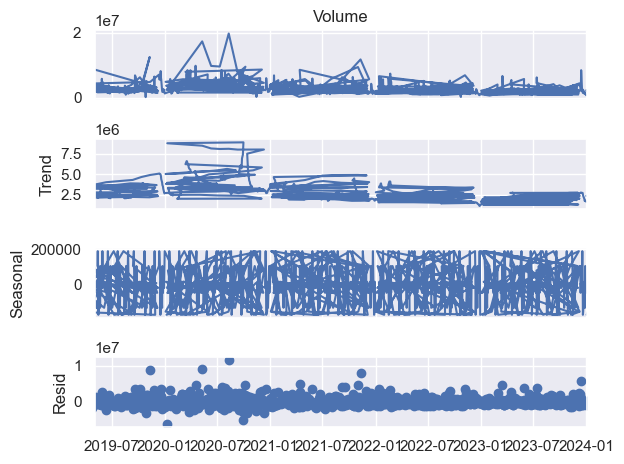

In [22]:
#Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_final['Volume'], period=12)
decomposition.plot()
plt.show()

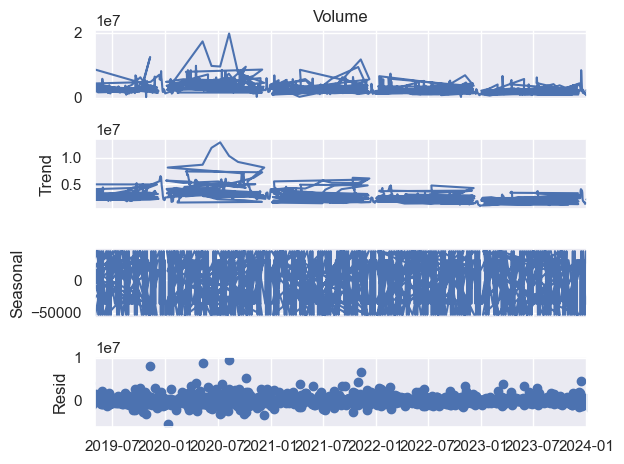

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_final['Volume'], period=5)
decomposition.plot()
plt.show()

In [26]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print("Trend", '\n', trend)

print("seasonality", '\n', seasonality)

print("residual", '\n', residual)


Trend 
 Date
2019-05-03          NaN
2019-06-03          NaN
2019-07-03    2553462.6
2019-08-03    2595248.2
2019-11-03    2434871.4
                ...    
2024-02-26    2359821.6
2024-02-27    2517955.0
2024-02-28    2418993.6
2024-02-29          NaN
2024-01-03          NaN
Name: trend, Length: 1235, dtype: float64
seasonality 
 Date
2019-05-03   -53171.081613
2019-06-03    14249.253346
2019-07-03    44462.414256
2019-08-03   -36219.858849
2019-11-03    30679.272859
                  ...     
2024-02-26   -53171.081613
2024-02-27    14249.253346
2024-02-28    44462.414256
2024-02-29   -36219.858849
2024-01-03    30679.272859
Name: seasonal, Length: 1235, dtype: float64
residual 
 Date
2019-05-03              NaN
2019-06-03              NaN
2019-07-03    -58041.014256
2019-08-03   -527957.341151
2019-11-03    646138.327141
                  ...      
2024-02-26   -927366.518387
2024-02-27    428270.746654
2024-02-28   -524231.014256
2024-02-29              NaN
2024-01-03              

In [27]:
df_final.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-03,2005.000000,2007.000000,1976.599976,1988.099976,1779.321899,2449622
2019-06-03,1989.300049,2015.000000,1985.050049,1999.599976,1789.614136,2635047
2019-07-03,2005.000000,2024.050049,2000.199951,2013.300049,1801.875977,2539884
2019-08-03,2025.000000,2033.000000,2010.050049,2022.699951,1810.288452,2031071
2019-11-03,2028.900024,2033.000000,2003.650024,2014.800049,1803.218384,3111689


In [29]:
df_final['Year'] = df_final.index.year
df_final['Month'] = df_final.index.month
df_final['Days'] = df_final.index.day
df_final.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Days
Date,,,,,,,,,
2019-05-03,2005.000000,2007.000000,1976.599976,1988.099976,1779.321899,2449622,2019,5,3
2019-06-03,1989.300049,2015.000000,1985.050049,1999.599976,1789.614136,2635047,2019,6,3
2019-07-03,2005.000000,2024.050049,2000.199951,2013.300049,1801.875977,2539884,2019,7,3
2019-08-03,2025.000000,2033.000000,2010.050049,2022.699951,1810.288452,2031071,2019,8,3
2019-11-03,2028.900024,2033.000000,2003.650024,2014.800049,1803.218384,3111689,2019,11,3


In [30]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-03,2005.000000,2007.000000,1976.599976,1988.099976,1779.321899,2449622
1,2019-06-03,1989.300049,2015.000000,1985.050049,1999.599976,1789.614136,2635047
2,2019-07-03,2005.000000,2024.050049,2000.199951,2013.300049,1801.875977,2539884
3,2019-08-03,2025.000000,2033.000000,2010.050049,2022.699951,1810.288452,2031071
4,2019-11-03,2028.900024,2033.000000,2003.650024,2014.800049,1803.218384,3111689


In [31]:
df = pd.read_csv('/Users/pawankumarkc/Documents/vscode_workspace/MLAlgo/datasets/TSForecasting/TCS.NS.csv')

In [32]:
df['Time_stamp'] = pd.to_datetime(df['Date'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1235 non-null   object        
 1   Open        1235 non-null   float64       
 2   High        1235 non-null   float64       
 3   Low         1235 non-null   float64       
 4   Close       1235 non-null   float64       
 5   Adj Close   1235 non-null   float64       
 6   Volume      1235 non-null   int64         
 7   Time_stamp  1235 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 77.3+ KB


In [34]:
df_final_model = df.set_index('Time_stamp')
df_final_model.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Time_stamp,,,,,,,
2019-05-03,05/03/19,2005.000000,2007.000000,1976.599976,1988.099976,1779.321899,2449622
2019-06-03,06/03/19,1989.300049,2015.000000,1985.050049,1999.599976,1789.614136,2635047
2019-07-03,07/03/19,2005.000000,2024.050049,2000.199951,2013.300049,1801.875977,2539884
2019-08-03,08/03/19,2025.000000,2033.000000,2010.050049,2022.699951,1810.288452,2031071
2019-11-03,11/03/19,2028.900024,2033.000000,2003.650024,2014.800049,1803.218384,3111689


In [35]:
df_final_model['Year'] = df_final_model.index.year
df_final_model['Month'] = df_final_model.index.month
df_final_model.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
Time_stamp,,,,,,,,,
2019-05-03,05/03/19,2005.000000,2007.000000,1976.599976,1988.099976,1779.321899,2449622,2019,5
2019-06-03,06/03/19,1989.300049,2015.000000,1985.050049,1999.599976,1789.614136,2635047,2019,6
2019-07-03,07/03/19,2005.000000,2024.050049,2000.199951,2013.300049,1801.875977,2539884,2019,7
2019-08-03,08/03/19,2025.000000,2033.000000,2010.050049,2022.699951,1810.288452,2031071,2019,8
2019-11-03,11/03/19,2028.900024,2033.000000,2003.650024,2014.800049,1803.218384,3111689,2019,11


In [37]:
df_final_model.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
Time_stamp,,,,,,,,,
2024-02-29,29/02/24,4099.000000,4138.100098,4064.550049,4095.100098,4095.100098,3772719,2024,2
2024-01-03,01/03/24,4107.200195,4140.000000,4086.800049,4094.350098,4094.350098,2043265,2024,1


In [36]:
df_final_model.shape

(1235, 9)

In [39]:
train = df_final_model[pd.to_datetime(df_final_model['Date']) < pd.to_datetime('2023-6-01')]  
train.shape

(1047, 9)

In [40]:
test = df_final_model[pd.to_datetime(df_final_model['Date']) >= pd.to_datetime('2023-6-01')]  
test.shape

(188, 9)

In [41]:
train.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
Time_stamp,,,,,,,,,
2023-02-11,02/11/23,3343.199951,3375.949951,3343.199951,3360.100098,3344.602295,1245384,2023,2
2023-03-11,03/11/23,3382.000000,3387.899902,3344.300049,3350.899902,3335.444336,1402598,2023,3
2023-01-12,01/12/23,3500.000000,3516.949951,3490.050049,3511.649902,3495.453125,1172141,2023,1
2023-04-12,04/12/23,3544.649902,3547.800049,3498.000000,3512.449951,3496.249268,1625213,2023,4
2023-05-12,05/12/23,3538.000000,3538.000000,3502.800049,3531.600098,3515.311279,1377656,2023,5


In [42]:
test.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
Time_stamp,,,,,,,,,
2024-02-26,26/02/24,4036.000000,4050.000000,3982.750000,4001.050049,4001.050049,1379284,2024,2
2024-02-27,27/02/24,3999.000000,4124.000000,3999.000000,4104.399902,4104.399902,2960475,2024,2
2024-02-28,28/02/24,4095.600098,4154.899902,4089.000000,4118.950195,4118.950195,1939225,2024,2
2024-02-29,29/02/24,4099.000000,4138.100098,4064.550049,4095.100098,4095.100098,3772719,2024,2
2024-01-03,01/03/24,4107.200195,4140.000000,4086.800049,4094.350098,4094.350098,2043265,2024,1


In [43]:
train_final = train[['Volume']]
test_final = test[['Volume']]

In [44]:
train_final.head(2)

,Volume
Time_stamp,
2019-05-03,2449622
2019-06-03,2635047


In [45]:
test_final.head(2)

,Volume
Time_stamp,
2023-06-01,2488376
2023-09-01,2885060


In [46]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Check for stationarity of series at alpha <= 0.05 using statistical test (adfuller, rolling stats)

def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    # plot rolling stats
    orig = plt.plot(timeseries, color='blue', label = 'Original')
    mean = plt.plot(rolmean, col='red', label='rolling mean')
    std = plt.plot(rolstd, col='black', label='rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean and standard deviation - Stationary or not')
    plt.show(block=False)

    #Perform dickey Fuller test
    print('Dickey Fuller test result :')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index= ['ADF Test stats', 'P value', '#Lags', 'No. of Observations' ])
    for key, value in dftest[4].items():
        dfoutput['Critical ']


In [47]:
def stationarity(timeseries):
    result = adfuller(timeseries)
    print('Augumented Dickly Fuller test - Check for Stationary data')
    labels = ['ADF Test stats', 'P value', '#Lags', 'No. of Observations' ]

    for i, j in zip(result, labels):
        print(j, str(i))

    if result[1] < 0.05: # Checking P value
        print('Strong evidance against Null hypothesis and my timeseries is stationary')
    else:
        print('Weak evidance against Null hypothesis and my timeseries is non - stationary')

In [48]:
stationarity(train_final['Volume'])

Augumented Dickly Fuller test - Check for Stationary data
ADF Test stats -5.928368275368913
P value 2.413316862707953e-07
#Lags 7
No. of Observations 1039
Strong evidance against Null hypothesis and my timeseries is stationary


In [ ]:
# Time series is stationary at 5% alpha value as per dickey fuller test

In [49]:
import itertools
p=q=range(0,3)
d = range(0,1) #Default considering 1, as p value is less than 0.05 already in first instance

pdq = list(itertools.product(p,d,q)) #Trend

model_pdq = [(x[0], x[1], x[2], 5)for x in list(itertools.product(p,d,q))] # Seasonality
print('Example of parameters combination for model')
print('Model : {} {} '.format(pdq[1], model_pdq[1]))
print('Model : {} {} '.format(pdq[1], model_pdq[2]))
print('Model : {} {} '.format(pdq[1], model_pdq[0]))
print('Model : {} {} '.format(pdq[0], model_pdq[1]))
print('Model : {} {} '.format(pdq[2], model_pdq[1]))


Example of parameters combination for model
Model : (0, 0, 1) (0, 0, 1, 5) 
Model : (0, 0, 1) (0, 0, 2, 5) 
Model : (0, 0, 1) (0, 0, 0, 5) 
Model : (0, 0, 0) (0, 0, 1, 5) 
Model : (0, 0, 2) (0, 0, 1, 5) 


## Building ARIMA model


In [50]:
#Creating empty df with col names

dfobj = pd.DataFrame(columns=['params','AIC'])

In [51]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    model = ARIMA(train_final['Volume'], order=param)
    #ARIMA = Only trend no seasonality. For seasonality SARIMA
    results_ARIMA = model.fit()
    print('ARIMA{} - AIC: {}'.format(param, results_ARIMA.aic))
    dfobj = dfobj.append({'param':param, 'AIC': results_ARIMA.aic}, ignore_index=True)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Libra

ARIMA(0, 0, 0) - AIC: 39287.11883286052
ARIMA(0, 0, 1) - AIC: 32831.43632053809
ARIMA(0, 0, 2) - AIC: 32791.77484139544
ARIMA(1, 0, 0) - AIC: 32722.177051230276
ARIMA(1, 0, 1) - AIC: 32635.872094610968
ARIMA(1, 0, 2) - AIC: 32624.785684753304
ARIMA(2, 0, 0) - AIC: 32684.642561364373
ARIMA(2, 0, 1) - AIC: 32625.38266735857


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Libra

ARIMA(2, 0, 2) - AIC: 32625.335352054637


In [53]:
dfobj.sort_values(by=['AIC'])

,params,AIC,param
5,NaN,32624.785685,"(1, 0, 2)"
8,NaN,32625.335352,"(2, 0, 2)"
7,NaN,32625.382667,"(2, 0, 1)"
4,NaN,32635.872095,"(1, 0, 1)"
6,NaN,32684.642561,"(2, 0, 0)"
3,NaN,32722.177051,"(1, 0, 0)"
2,NaN,32791.774841,"(0, 0, 2)"
1,NaN,32831.436321,"(0, 0, 1)"
0,NaN,39287.118833,"(0, 0, 0)"


In [ ]:
# ARIMA (1, 0, 2) has the lowest AIC value 32624.785685

In [54]:
model = ARIMA(train_final['Volume'], order=(1,0,2),
               enforce_stationarity=False, enforce_invertibility=False)
result_ARIMA = model.fit()

print(results_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                 1047
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -16306.668
Date:                Sat, 02 Mar 2024   AIC                          32625.335
Time:                        12:27:52   BIC                          32655.057
Sample:                             0   HQIC                         32636.607
                               - 1047                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.915e+06   1.67e-08   1.75e+14      0.000    2.92e+06    2.92e+06
ar.L1          0.6232      0.138      4.528      0.000       0.353       0.893
ar.L2          0.2980      0.119      2.511      0.0

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Libra

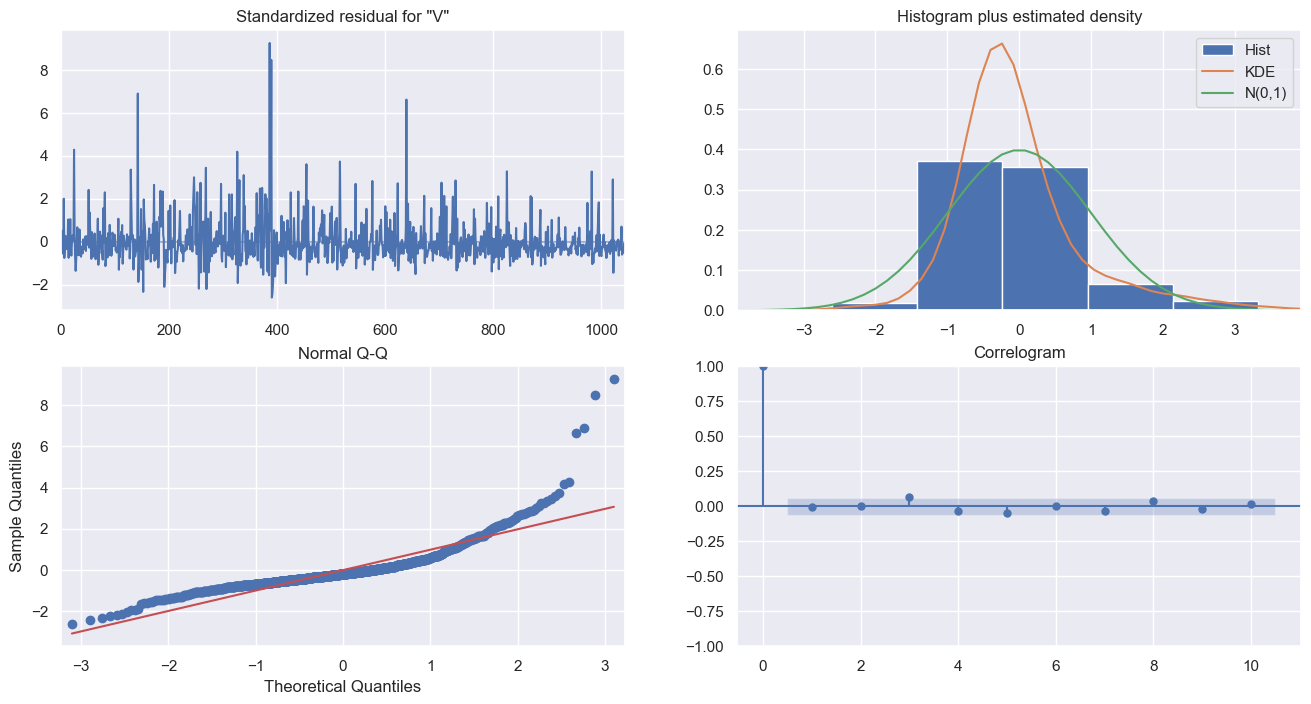

In [55]:
result_ARIMA.plot_diagnostics(figsize=(16,8))
plt.show()

In [56]:
final_hat_avg = test_final.copy()
pred_ARIMA = results_ARIMA.forecast(steps=len(test_final))
pred_ARIMA

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



1047    1.755896e+06
1048    1.900200e+06
1049    1.937243e+06
1050    2.003325e+06
1051    2.055544e+06
            ...     
1230    2.915260e+06
1231    2.915261e+06
1232    2.915262e+06
1233    2.915263e+06
1234    2.915263e+06
Name: predicted_mean, Length: 188, dtype: float64

In [57]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse = sqrt(mean_squared_error(test_final.Volume, pred_ARIMA, squared=False))
print(rmse)

1153.3379516020573


In [58]:
import numpy as np
def calculate_mape(actuals, predicted):
    actuals, predicted = np.array(actuals), np.array(predicted)
    return np.mean(np.abs((actuals - predicted)/ actuals)) *100

In [60]:
mape = calculate_mape(test_final.Volume, pred_ARIMA)
print('MAPE :', mape)

# MAPE  74% is not a good value

MAPE : 74.09435531368503


In [61]:
resultDF = pd.DataFrame({'Test RMSE' : rmse}, index=['ARIMA(1,0,2)'])
resultDF

,Test RMSE
"ARIMA(1,0,2)",1153.337952


ValueError: x and y must have same first dimension, but have shapes (1047,) and (188,)

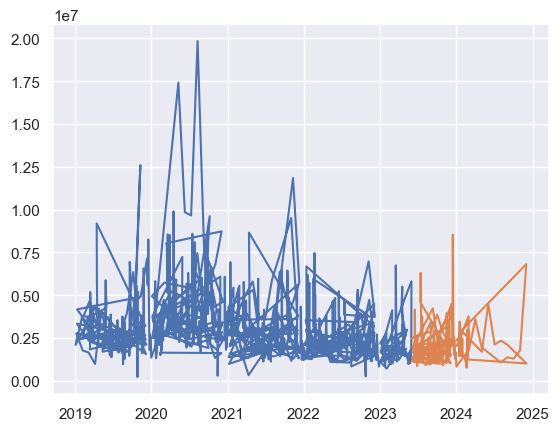

In [62]:
plt.plot(train_final, label='Training Data')
plt.plot(test_final, label='Test Data')

plt.plot(train_final.index, pred_ARIMA ,label='Predicted Data - ARIMA model')
plt.legend(loc='best')
plt.grid()


# SARIMA model

In [63]:
dfobj2 = pd.DataFrame(columns=['Param', 'seasonal', 'AIC'])
dfobj2

,Param,seasonal,AIC


In [75]:
import statsmodels.api as sm
dfobj2 = pd.DataFrame(columns=['Param', 'seasonal', 'AIC'])

for param in pdq:
    for param_seasonal in model_pdq:
        mpdel = sm.tsa.statespace.SARIMAX(train_final['Volume'], order=param, seasonal_order=param_seasonal, 
                                          enforce_invertibility=False, enforce_stationarity=False)
        results_SARIMA = model.fit()

        print('SARIMA{} x {}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfobj2 = dfobj2.append({'Param':param, 'seasonal':param_seasonal, 'AIC':results_SARIMA.aic}, ignore_index=True)
        


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Libra

SARIMA(0, 0, 0) x (0, 0, 0, 5)7 - AIC:32533.510244698584
SARIMA(0, 0, 0) x (0, 0, 1, 5)7 - AIC:32533.510244698584
SARIMA(0, 0, 0) x (0, 0, 2, 5)7 - AIC:32533.510244698584
SARIMA(0, 0, 0) x (1, 0, 0, 5)7 - AIC:32533.510244698584


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Libra

SARIMA(0, 0, 0) x (1, 0, 1, 5)7 - AIC:32533.510244698584
SARIMA(0, 0, 0) x (1, 0, 2, 5)7 - AIC:32533.510244698584
SARIMA(0, 0, 0) x (2, 0, 0, 5)7 - AIC:32533.510244698584
SARIMA(0, 0, 0) x (2, 0, 1, 5)7 - AIC:32533.510244698584


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Libra

SARIMA(0, 0, 0) x (2, 0, 2, 5)7 - AIC:32533.510244698584
SARIMA(0, 0, 1) x (0, 0, 0, 5)7 - AIC:32533.510244698584
SARIMA(0, 0, 1) x (0, 0, 1, 5)7 - AIC:32533.510244698584
SARIMA(0, 0, 1) x (0, 0, 2, 5)7 - AIC:32533.510244698584


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Libra

SARIMA(0, 0, 1) x (1, 0, 0, 5)7 - AIC:32533.510244698584
SARIMA(0, 0, 1) x (1, 0, 1, 5)7 - AIC:32533.510244698584
SARIMA(0, 0, 1) x (1, 0, 2, 5)7 - AIC:32533.510244698584
SARIMA(0, 0, 1) x (2, 0, 0, 5)7 - AIC:32533.510244698584


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Libra

SARIMA(0, 0, 1) x (2, 0, 1, 5)7 - AIC:32533.510244698584
SARIMA(0, 0, 1) x (2, 0, 2, 5)7 - AIC:32533.510244698584
SARIMA(0, 0, 2) x (0, 0, 0, 5)7 - AIC:32533.510244698584
SARIMA(0, 0, 2) x (0, 0, 1, 5)7 - AIC:32533.510244698584


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Libra

SARIMA(0, 0, 2) x (0, 0, 2, 5)7 - AIC:32533.510244698584
SARIMA(0, 0, 2) x (1, 0, 0, 5)7 - AIC:32533.510244698584
SARIMA(0, 0, 2) x (1, 0, 1, 5)7 - AIC:32533.510244698584
SARIMA(0, 0, 2) x (1, 0, 2, 5)7 - AIC:32533.510244698584


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Libra

SARIMA(0, 0, 2) x (2, 0, 0, 5)7 - AIC:32533.510244698584
SARIMA(0, 0, 2) x (2, 0, 1, 5)7 - AIC:32533.510244698584
SARIMA(0, 0, 2) x (2, 0, 2, 5)7 - AIC:32533.510244698584
SARIMA(1, 0, 0) x (0, 0, 0, 5)7 - AIC:32533.510244698584


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Libra

SARIMA(1, 0, 0) x (0, 0, 1, 5)7 - AIC:32533.510244698584
SARIMA(1, 0, 0) x (0, 0, 2, 5)7 - AIC:32533.510244698584
SARIMA(1, 0, 0) x (1, 0, 0, 5)7 - AIC:32533.510244698584
SARIMA(1, 0, 0) x (1, 0, 1, 5)7 - AIC:32533.510244698584


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Libra

SARIMA(1, 0, 0) x (1, 0, 2, 5)7 - AIC:32533.510244698584
SARIMA(1, 0, 0) x (2, 0, 0, 5)7 - AIC:32533.510244698584
SARIMA(1, 0, 0) x (2, 0, 1, 5)7 - AIC:32533.510244698584
SARIMA(1, 0, 0) x (2, 0, 2, 5)7 - AIC:32533.510244698584


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Libra

SARIMA(1, 0, 1) x (0, 0, 0, 5)7 - AIC:32533.510244698584
SARIMA(1, 0, 1) x (0, 0, 1, 5)7 - AIC:32533.510244698584
SARIMA(1, 0, 1) x (0, 0, 2, 5)7 - AIC:32533.510244698584
SARIMA(1, 0, 1) x (1, 0, 0, 5)7 - AIC:32533.510244698584


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Libra

SARIMA(1, 0, 1) x (1, 0, 1, 5)7 - AIC:32533.510244698584
SARIMA(1, 0, 1) x (1, 0, 2, 5)7 - AIC:32533.510244698584
SARIMA(1, 0, 1) x (2, 0, 0, 5)7 - AIC:32533.510244698584
SARIMA(1, 0, 1) x (2, 0, 1, 5)7 - AIC:32533.510244698584


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Libra

SARIMA(1, 0, 1) x (2, 0, 2, 5)7 - AIC:32533.510244698584
SARIMA(1, 0, 2) x (0, 0, 0, 5)7 - AIC:32533.510244698584
SARIMA(1, 0, 2) x (0, 0, 1, 5)7 - AIC:32533.510244698584
SARIMA(1, 0, 2) x (0, 0, 2, 5)7 - AIC:32533.510244698584


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Libra

SARIMA(1, 0, 2) x (1, 0, 0, 5)7 - AIC:32533.510244698584
SARIMA(1, 0, 2) x (1, 0, 1, 5)7 - AIC:32533.510244698584
SARIMA(1, 0, 2) x (1, 0, 2, 5)7 - AIC:32533.510244698584
SARIMA(1, 0, 2) x (2, 0, 0, 5)7 - AIC:32533.510244698584


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Libra

SARIMA(1, 0, 2) x (2, 0, 1, 5)7 - AIC:32533.510244698584
SARIMA(1, 0, 2) x (2, 0, 2, 5)7 - AIC:32533.510244698584
SARIMA(2, 0, 0) x (0, 0, 0, 5)7 - AIC:32533.510244698584
SARIMA(2, 0, 0) x (0, 0, 1, 5)7 - AIC:32533.510244698584


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Libra

SARIMA(2, 0, 0) x (0, 0, 2, 5)7 - AIC:32533.510244698584
SARIMA(2, 0, 0) x (1, 0, 0, 5)7 - AIC:32533.510244698584
SARIMA(2, 0, 0) x (1, 0, 1, 5)7 - AIC:32533.510244698584
SARIMA(2, 0, 0) x (1, 0, 2, 5)7 - AIC:32533.510244698584


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Libra

SARIMA(2, 0, 0) x (2, 0, 0, 5)7 - AIC:32533.510244698584
SARIMA(2, 0, 0) x (2, 0, 1, 5)7 - AIC:32533.510244698584
SARIMA(2, 0, 0) x (2, 0, 2, 5)7 - AIC:32533.510244698584
SARIMA(2, 0, 1) x (0, 0, 0, 5)7 - AIC:32533.510244698584


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Libra

SARIMA(2, 0, 1) x (0, 0, 1, 5)7 - AIC:32533.510244698584
SARIMA(2, 0, 1) x (0, 0, 2, 5)7 - AIC:32533.510244698584
SARIMA(2, 0, 1) x (1, 0, 0, 5)7 - AIC:32533.510244698584
SARIMA(2, 0, 1) x (1, 0, 1, 5)7 - AIC:32533.510244698584


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Libra

SARIMA(2, 0, 1) x (1, 0, 2, 5)7 - AIC:32533.510244698584
SARIMA(2, 0, 1) x (2, 0, 0, 5)7 - AIC:32533.510244698584
SARIMA(2, 0, 1) x (2, 0, 1, 5)7 - AIC:32533.510244698584
SARIMA(2, 0, 1) x (2, 0, 2, 5)7 - AIC:32533.510244698584


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Libra

SARIMA(2, 0, 2) x (0, 0, 0, 5)7 - AIC:32533.510244698584
SARIMA(2, 0, 2) x (0, 0, 1, 5)7 - AIC:32533.510244698584
SARIMA(2, 0, 2) x (0, 0, 2, 5)7 - AIC:32533.510244698584
SARIMA(2, 0, 2) x (1, 0, 0, 5)7 - AIC:32533.510244698584


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Libra

SARIMA(2, 0, 2) x (1, 0, 1, 5)7 - AIC:32533.510244698584
SARIMA(2, 0, 2) x (1, 0, 2, 5)7 - AIC:32533.510244698584
SARIMA(2, 0, 2) x (2, 0, 0, 5)7 - AIC:32533.510244698584
SARIMA(2, 0, 2) x (2, 0, 1, 5)7 - AIC:32533.510244698584
SARIMA(2, 0, 2) x (2, 0, 2, 5)7 - AIC:32533.510244698584


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.



In [76]:
dfobj2.sort_values(by=['AIC'])

,Param,seasonal,AIC
0,"(0, 0, 0)","(0, 0, 0, 5)",32533.510245
57,"(2, 0, 0)","(1, 0, 0, 5)",32533.510245
56,"(2, 0, 0)","(0, 0, 2, 5)",32533.510245
55,"(2, 0, 0)","(0, 0, 1, 5)",32533.510245
54,"(2, 0, 0)","(0, 0, 0, 5)",32533.510245
...,...,...,...
23,"(0, 0, 2)","(1, 0, 2, 5)",32533.510245
22,"(0, 0, 2)","(1, 0, 1, 5)",32533.510245
21,"(0, 0, 2)","(1, 0, 0, 5)",32533.510245
39,"(1, 0, 1)","(1, 0, 0, 5)",32533.510245
